In [20]:
import numpy as np
import healpy as hp
from healpy.newvisufunc import projview
from astropy.table import Table
from astropy.io import fits

import matplotlib
from matplotlib import pyplot as plt

In [2]:
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['axes.labelsize'] = 22
matplotlib.rcParams['legend.fontsize'] = 18

matplotlib.rc('text', usetex=True)

In [3]:
cmap_map = 'plasma'

In [21]:
#fn_zodi = f'/scratch/aew492/quasars/maps/zodi/zodimap_90degfromSun_oneyear_1.2um.fits'
fn_zodi = f'../../quasar_data_abby/maps/zodi/zodimap_90degfromSun_oneyear_1.2um.fits'
#map_zodi = maps.get_unwise_scan_map(NSIDE, fn_map=fn_unwisescanmap)
#map_zodi = hp.read_map(fn_zodi)
#map_zodi = Table.read(fn_zodi, format='fits')
hdul = fits.open(fn_zodi)
print(hdul)

In [24]:
map_zodi = hdul[0].data

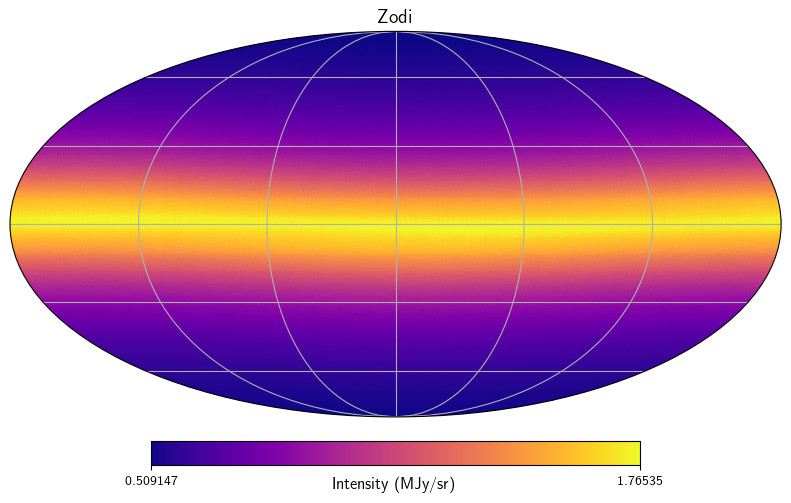

In [29]:
projview(map_zodi, title=rf"Zodi",
         unit=r'Intensity (MJy/sr)', cmap=cmap_map, coord=['C'], 
         #min=0.0, max=3, cbar_ticks=[0, 0.25, 0.5, 0.75, 1.0],
         #min=0.01, max=10, 
         #cbar_ticks=[0.01, 0.1, 1, 10],
         graticule=True, 
         #norm='log'
        )

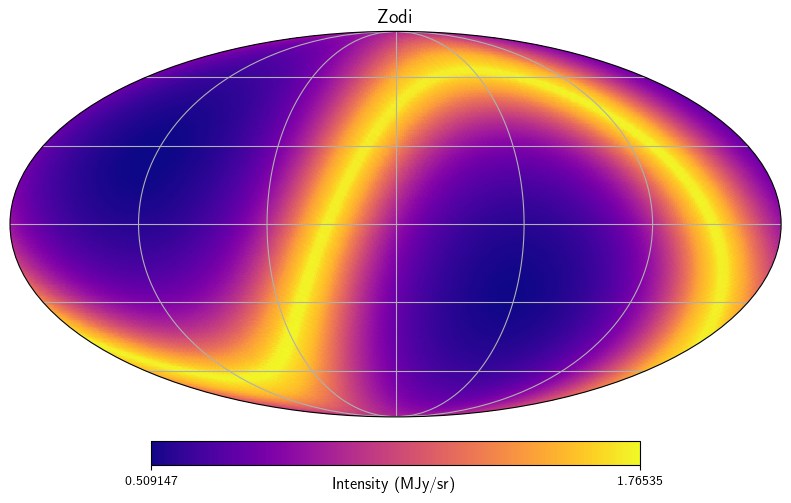

In [30]:
projview(map_zodi, title=rf"Zodi",
         unit=r'Intensity (MJy/sr)', cmap=cmap_map, coord=['C', 'G'], 
         #min=0.0, max=3, cbar_ticks=[0, 0.25, 0.5, 0.75, 1.0],
         #min=0.01, max=10, 
         #cbar_ticks=[0.01, 0.1, 1, 10],
         graticule=True, 
         #norm='log'
        )

# CatWISE

In [111]:
NSIDE = 64
NPIX = hp.nside2npix(NSIDE)
# for plotting purposes
fac_stdev = 1.0

In [112]:
#fn_catwise = '../../quasar_data_abby/catalogs/catwise_agns/catwise_agns_master.fits'
fn_catwise = '../../quasar_data_abby/catalogs/catwise_agns/catwise_agns_master_masks.fits'
tab_catwise = Table.read(fn_catwise)
N_catwise = len(tab_catwise)
print(f"Number of data sources: {N_catwise}")

Number of data sources: 3136211


In [113]:
tab_catwise.columns

<TableColumns names=('source_id','ra','dec','w1','w2','w12','l','b','elon','elat','radius','radius2','pa')>

In [114]:
pixel_indices_catwise = hp.ang2pix(NSIDE, tab_catwise['ra'], tab_catwise['dec'], lonlat=True)
map_catwise = np.bincount(pixel_indices_catwise, minlength=NPIX)

In [115]:
print(np.median(map_catwise), np.std(map_catwise))

63.0 43.88600054850093


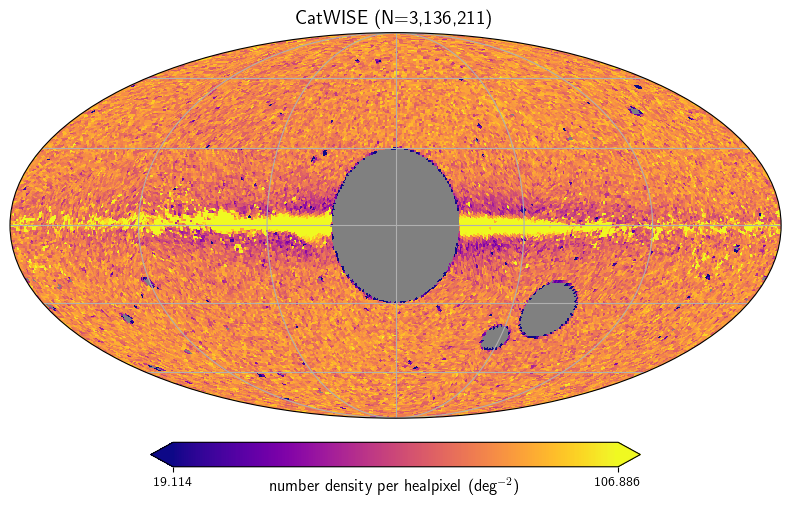

In [116]:
title_catwise = rf"CatWISE (N={N_catwise:,})"
projview(map_catwise, title=title_catwise,
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.median(map_catwise)-fac_stdev*np.std(map_catwise), 
            max=np.median(map_catwise)+fac_stdev*np.std(map_catwise), 
            norm='log', graticule=True,
            #cbar_ticks=[5, 10, 20],
            ) 

In [121]:
print(np.sum(tab_catwise['w1']<9))

0


In [122]:
tab_catwise_w1 = tab_catwise[(tab_catwise['w1'] < 16.4) & (tab_catwise['w1'] > 9)]
tab_catwise_w1 = tab_catwise_w1[np.abs(tab_catwise_w1['b'])>15]

In [123]:
N_catwise_w1 = len(tab_catwise_w1)
print(f"Number of data sources: {N_catwise_w1}")

Number of data sources: 1921305


In [124]:
pixel_indices_catwise_w1 = hp.ang2pix(NSIDE, tab_catwise_w1['ra'], tab_catwise_w1['dec'], lonlat=True)
map_catwise_w1 = np.bincount(pixel_indices_catwise_w1, minlength=NPIX)

In [125]:
print(np.median(map_catwise_w1)-fac_stdev*np.std(map_catwise_w1))
print(np.median(map_catwise_w1), np.std(map_catwise_w1))

24.545726289466337
51.0 26.454273710533663


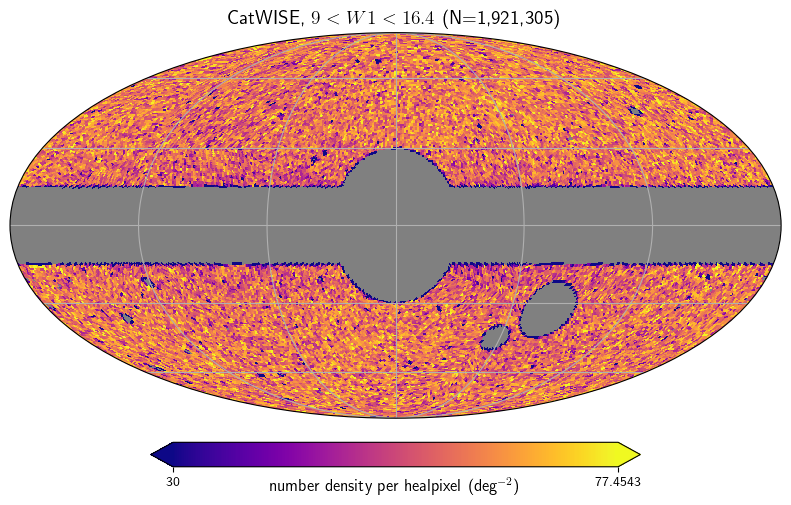

In [126]:
title_catwise_w1 = rf"CatWISE, $9<W1<16.4$ (N={N_catwise_w1:,})"
projview(map_catwise_w1, title=title_catwise_w1,
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            #min=np.median(map_catwise_w1)-fac_stdev*np.std(map_catwise_w1), 
            min=30,
            max=np.median(map_catwise_w1)+fac_stdev*np.std(map_catwise_w1), 
            norm='log', graticule=True,
            #cbar_ticks=[5, 10, 20],
            ) 

In [127]:
fn_catwise_masks_w1 = '../../quasar_data_abby/catalogs/catwise_agns/catwise_agns_master_masks_w1_b15.fits'
tab_catwise_w1.write(fn_catwise_masks_w1)

# With blim

In [99]:
fn_catwise = '../../quasar_data_abby/catalogs/catwise_agns/masked_catwise_agns_master_blim30.fits'
hdul = fits.open(fn_catwise)

In [100]:
hdul[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -64 / number of bits per data pixel                  
NAXIS   =                    1 / number of data axes                            
NAXIS1  =                49152 / length of data axis 1                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 

In [101]:
map_catwise = hdul[0].data

In [102]:
map_catwise.shape

(49152,)

In [103]:
np.sum(np.isnan(map_catwise))

25590

In [104]:
print(np.median(map_catwise), np.std(map_catwise))

nan nan


In [105]:
idx_nan = np.isnan(map_catwise)

In [106]:
map_catwise[idx_nan] = hp.UNSEEN

In [108]:
np.median(map_catwise[~idx_nan]), np.std(map_catwise[~idx_nan])

(56.0, 8.451010080304515)

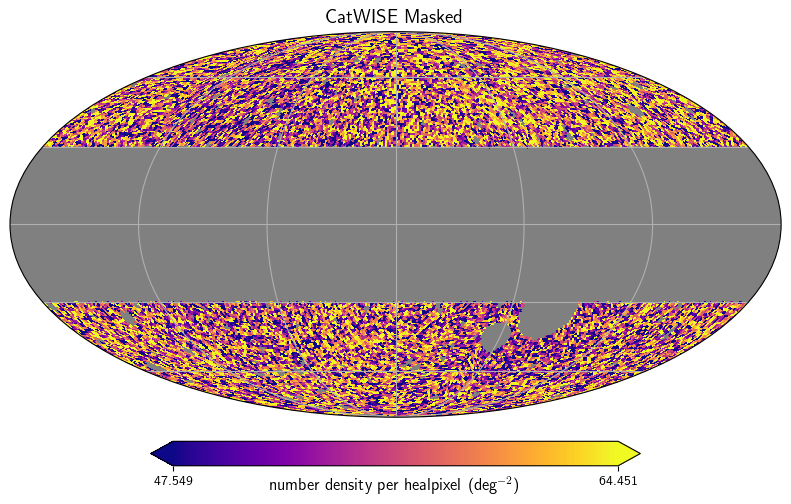

In [110]:
title_catwise = rf"CatWISE Masked"
projview(map_catwise, title=title_catwise,
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.median(map_catwise[~idx_nan])-fac_stdev*np.std(map_catwise[~idx_nan]), 
            max=np.median(map_catwise[~idx_nan])+fac_stdev*np.std(map_catwise[~idx_nan]), 
            norm='log', graticule=True,
            #cbar_ticks=[5, 10, 20],
            ) 

## Quaia comp

In [129]:
fn_quaia = '../../quasar_data_abby/catalogs/quaia/quaia_G20.0.fits'
tab_quaia = Table.read(fn_quaia)

In [133]:
tab_quaia['ra']

45.18857525358218
45.189480360571665
44.79936522932521
45.07952191471843
44.99106740350177
45.46314576335495
45.61545491514258
45.47519075007384
45.1740573490588
45.174414423280055
...


In [134]:
tab_catwise_w1['ra']

359.41333750412764
359.3693827041276
359.82987120412764
359.65309700412763
359.3862815041276
359.9689054041276
359.5030589041276
359.5080253041276
359.80865810412763
359.5836780041276
...


In [135]:
print(np.min(tab_quaia['ra']), np.max(tab_quaia['ra']))

0.00026225516912966034 359.99980021436215


In [136]:
print(np.min(tab_catwise_w1['ra']), np.max(tab_catwise_w1['ra']))

0.000151211688 359.999847831017
